In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix

In [2]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [8]:
K=len(set(y_train))
print(f'Number of classes in labels: {K}')

Number of classes in labels: 10


In [12]:
# Build the model

i=Input(shape=x_train[0].shape)
x=Conv2D(32, (3,3), activation='relu', padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32, (3,3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2, 2))(x)

x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

model=Model(i, x)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 29s 9ms/step - loss: 1.2768 - accuracy: 0.5624 - val_loss: 1.0052 - val_accuracy: 0.6513
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8214 - accuracy: 0.7152 - val_loss: 0.7748 - val_accuracy: 0.7314
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6756 - accuracy: 0.7675 - val_loss: 0.7508 - val_accuracy: 0.7535
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5768 - accuracy: 0.8022 - val_loss: 0.7193 - val_accuracy: 0.7643
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4851 - accuracy: 0.8356 - val_loss: 0.6138 - val_accuracy: 0.7958
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4129 - accuracy: 0.8576 - val_loss: 0.7291 - val_accuracy: 0.7776
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3474 - accuracy: 0.8808 - val_loss: 0.6320 - val_a

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [16]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/TF2.0/improved_cifar10.h5')

In [17]:
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator=data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch=x_train.shape[0]
r=model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


<ipython-input-17-639dc62fbb19>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)


 1562/50000 [..............................] - ETA: 21:48 - loss: 0.5447 - accuracy: 0.8256

50000/50000 [==============================] - 45s 872us/step - loss: 0.5445 - accuracy: 0.8256 - val_loss: 0.4946 - val_accuracy: 0.8351


313/313 [==============================] - 2s 5ms/step


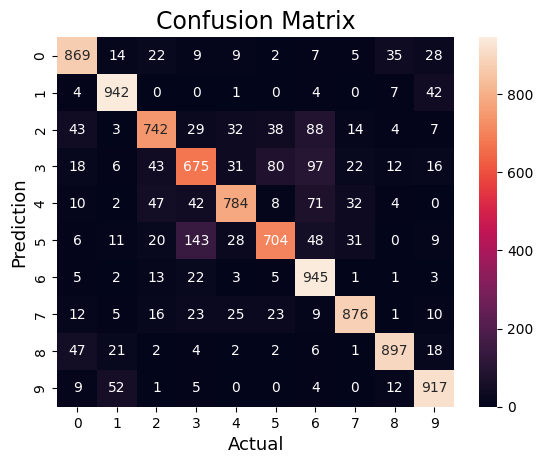

In [18]:
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test, p_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()